<center> <h1> Testing the utils for the project</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/

In [1]:
import utilities.EdwinRueda_utils as erutils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv",
                  index_col=0)
r_g = open("../data/reference_genes.txt").read().splitlines()
r_g.remove("idnT")
X_train = data.loc[r_g]
X_train.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964


#### Data scaling with the utils

In [3]:
scaler = erutils.scaler(xmin=-1, xmax=1)
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train_scaler.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377


#### Creating the Discriminator and Generator networks

In [4]:
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential 

noise_input = 50 #size of the noise vector
## Generator Network
G = Sequential()
G.add(Dense(noise_input, input_shape=(noise_input,)))
G.add(Dense(32))
G.add(Dropout(.1))
G.add(Dense(64))
G.add(Dropout(.15))
G.add(Dense(32))
G.add(Dense(9, activation="tanh"))

## Discriminator Network
D = Sequential()
D.add(Dense(9, input_shape=(9,)))
D.add(Dense(32))
D.add(LeakyReLU(alpha=.2))
D.add(Dropout(.1))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

In [5]:
noise_vector = tf.random_normal_initializer(0.,1.)([1, noise_input])
print("shape of the noise vector:",noise_vector.shape)
print("---------------------------------------")
synthetic_gene = G(noise_vector)
print("synthetic gene:", synthetic_gene.numpy())
print("---------------------------------------")
print("Probability of the D network:", D(synthetic_gene).numpy())
print("---------------------------------------")
print("loss:", erutils.gan_utils().binary_cross_entropy(D(synthetic_gene).numpy(), 0.).numpy())

shape of the noise vector: (1, 50)
---------------------------------------
synthetic gene: [[ 0.74865052 -0.98322844  0.50474009  0.51724761 -0.99414398  0.2166934
   0.30439422  0.68458417  0.51960015]]
---------------------------------------
Probability of the D network: [[0.5730827]]
---------------------------------------
loss: 0.8511649722475912


#### Training the GAN network

In [6]:
batch_size = 20
epochs = 1700
optimizerG = tf.optimizers.SGD(lr=0.00015, momentum=0.92, decay=0.00015/epochs)
optimizerD = tf.optimizers.SGD(lr=0.0011, momentum=0.9, decay=0.0011/epochs)

gan_utilities = erutils.gan_utils()
gloss, dloss = gan_utilities.train(X_train_scaler, G, D, noise_input, epochs, batch_size, optimizerG, optimizerD)

epochs[0:1700] :: G_loss[0.560582] :: D_loss[0.710321] :: time:1.031311[s]
epochs[1:1700] :: G_loss[0.504516] :: D_loss[0.768718] :: time:0.009103[s]
epochs[2:1700] :: G_loss[0.504673] :: D_loss[0.769295] :: time:0.008909[s]
epochs[3:1700] :: G_loss[0.514935] :: D_loss[0.754354] :: time:0.008815[s]
epochs[4:1700] :: G_loss[0.576299] :: D_loss[0.702167] :: time:0.008854[s]
epochs[5:1700] :: G_loss[0.583789] :: D_loss[0.689911] :: time:0.008928[s]
epochs[6:1700] :: G_loss[0.544489] :: D_loss[0.729473] :: time:0.008784[s]
epochs[7:1700] :: G_loss[0.527001] :: D_loss[0.734438] :: time:0.009090[s]
epochs[8:1700] :: G_loss[0.525285] :: D_loss[0.733724] :: time:0.008848[s]
epochs[9:1700] :: G_loss[0.557389] :: D_loss[0.700483] :: time:0.009144[s]
epochs[10:1700] :: G_loss[0.519813] :: D_loss[0.719320] :: time:0.008908[s]
epochs[11:1700] :: G_loss[0.517923] :: D_loss[0.731786] :: time:0.008791[s]
epochs[12:1700] :: G_loss[0.625274] :: D_loss[0.672967] :: time:0.008791[s]
epochs[13:1700] :: G_l

epochs[109:1700] :: G_loss[0.781570] :: D_loss[0.598311] :: time:0.010068[s]
epochs[110:1700] :: G_loss[0.699204] :: D_loss[0.594980] :: time:0.012625[s]
epochs[111:1700] :: G_loss[0.757458] :: D_loss[0.581736] :: time:0.012619[s]
epochs[112:1700] :: G_loss[0.677660] :: D_loss[0.641344] :: time:0.014755[s]
epochs[113:1700] :: G_loss[0.816545] :: D_loss[0.548581] :: time:0.008879[s]
epochs[114:1700] :: G_loss[0.736622] :: D_loss[0.583210] :: time:0.009015[s]
epochs[115:1700] :: G_loss[0.709429] :: D_loss[0.620918] :: time:0.008906[s]
epochs[116:1700] :: G_loss[0.707818] :: D_loss[0.617566] :: time:0.008993[s]
epochs[117:1700] :: G_loss[0.742151] :: D_loss[0.580103] :: time:0.008868[s]
epochs[118:1700] :: G_loss[0.756516] :: D_loss[0.587515] :: time:0.008882[s]
epochs[119:1700] :: G_loss[0.769689] :: D_loss[0.568883] :: time:0.008778[s]
epochs[120:1700] :: G_loss[0.730075] :: D_loss[0.613701] :: time:0.008807[s]
epochs[121:1700] :: G_loss[0.755972] :: D_loss[0.597394] :: time:0.008830[s]

epochs[220:1700] :: G_loss[0.794682] :: D_loss[0.583007] :: time:0.013636[s]
epochs[221:1700] :: G_loss[0.921641] :: D_loss[0.538197] :: time:0.009338[s]
epochs[222:1700] :: G_loss[0.894839] :: D_loss[0.539227] :: time:0.010739[s]
epochs[223:1700] :: G_loss[0.777994] :: D_loss[0.608291] :: time:0.008953[s]
epochs[224:1700] :: G_loss[0.789941] :: D_loss[0.601160] :: time:0.008986[s]
epochs[225:1700] :: G_loss[0.774026] :: D_loss[0.629188] :: time:0.008940[s]
epochs[226:1700] :: G_loss[0.905881] :: D_loss[0.546474] :: time:0.008874[s]
epochs[227:1700] :: G_loss[0.785709] :: D_loss[0.594824] :: time:0.008974[s]
epochs[228:1700] :: G_loss[0.932242] :: D_loss[0.539327] :: time:0.008864[s]
epochs[229:1700] :: G_loss[1.024304] :: D_loss[0.510287] :: time:0.008916[s]
epochs[230:1700] :: G_loss[0.896084] :: D_loss[0.556372] :: time:0.008816[s]
epochs[231:1700] :: G_loss[0.917031] :: D_loss[0.540092] :: time:0.008847[s]
epochs[232:1700] :: G_loss[0.783227] :: D_loss[0.653820] :: time:0.008785[s]

epochs[339:1700] :: G_loss[0.863815] :: D_loss[0.585014] :: time:0.017051[s]
epochs[340:1700] :: G_loss[0.893147] :: D_loss[0.569128] :: time:0.012408[s]
epochs[341:1700] :: G_loss[0.978030] :: D_loss[0.573644] :: time:0.013216[s]
epochs[342:1700] :: G_loss[0.903797] :: D_loss[0.562307] :: time:0.012816[s]
epochs[343:1700] :: G_loss[0.921603] :: D_loss[0.554484] :: time:0.009137[s]
epochs[344:1700] :: G_loss[0.913188] :: D_loss[0.536788] :: time:0.012483[s]
epochs[345:1700] :: G_loss[0.941831] :: D_loss[0.599707] :: time:0.011570[s]
epochs[346:1700] :: G_loss[0.865708] :: D_loss[0.590584] :: time:0.008978[s]
epochs[347:1700] :: G_loss[0.887916] :: D_loss[0.595804] :: time:0.009102[s]
epochs[348:1700] :: G_loss[0.968344] :: D_loss[0.578955] :: time:0.008948[s]
epochs[349:1700] :: G_loss[0.840817] :: D_loss[0.591665] :: time:0.008965[s]
epochs[350:1700] :: G_loss[0.891801] :: D_loss[0.598073] :: time:0.009018[s]
epochs[351:1700] :: G_loss[0.798819] :: D_loss[0.657752] :: time:0.008972[s]

epochs[449:1700] :: G_loss[0.872604] :: D_loss[0.631814] :: time:0.011027[s]
epochs[450:1700] :: G_loss[0.885519] :: D_loss[0.620911] :: time:0.011069[s]
epochs[451:1700] :: G_loss[0.978525] :: D_loss[0.602970] :: time:0.009574[s]
epochs[452:1700] :: G_loss[0.955676] :: D_loss[0.630204] :: time:0.013222[s]
epochs[453:1700] :: G_loss[0.928877] :: D_loss[0.612725] :: time:0.013194[s]
epochs[454:1700] :: G_loss[0.798984] :: D_loss[0.674723] :: time:0.014250[s]
epochs[455:1700] :: G_loss[0.905494] :: D_loss[0.604756] :: time:0.009810[s]
epochs[456:1700] :: G_loss[1.000014] :: D_loss[0.586320] :: time:0.015386[s]
epochs[457:1700] :: G_loss[0.819133] :: D_loss[0.657214] :: time:0.011308[s]
epochs[458:1700] :: G_loss[1.007237] :: D_loss[0.553612] :: time:0.009302[s]
epochs[459:1700] :: G_loss[0.943253] :: D_loss[0.613953] :: time:0.009610[s]
epochs[460:1700] :: G_loss[0.924146] :: D_loss[0.614279] :: time:0.011243[s]
epochs[461:1700] :: G_loss[0.836927] :: D_loss[0.653000] :: time:0.009393[s]

epochs[570:1700] :: G_loss[1.005210] :: D_loss[0.596928] :: time:0.013499[s]
epochs[571:1700] :: G_loss[1.049486] :: D_loss[0.575540] :: time:0.011511[s]
epochs[572:1700] :: G_loss[0.900640] :: D_loss[0.623795] :: time:0.009110[s]
epochs[573:1700] :: G_loss[0.803986] :: D_loss[0.693214] :: time:0.008953[s]
epochs[574:1700] :: G_loss[0.873313] :: D_loss[0.631406] :: time:0.008940[s]
epochs[575:1700] :: G_loss[0.779673] :: D_loss[0.754535] :: time:0.009055[s]
epochs[576:1700] :: G_loss[0.879871] :: D_loss[0.662709] :: time:0.009008[s]
epochs[577:1700] :: G_loss[0.856645] :: D_loss[0.644685] :: time:0.008909[s]
epochs[578:1700] :: G_loss[0.795246] :: D_loss[0.717616] :: time:0.010252[s]
epochs[579:1700] :: G_loss[0.820363] :: D_loss[0.660299] :: time:0.008866[s]
epochs[580:1700] :: G_loss[0.844575] :: D_loss[0.645402] :: time:0.008895[s]
epochs[581:1700] :: G_loss[0.845148] :: D_loss[0.662058] :: time:0.008836[s]
epochs[582:1700] :: G_loss[0.912073] :: D_loss[0.636303] :: time:0.008963[s]

epochs[685:1700] :: G_loss[0.875864] :: D_loss[0.615861] :: time:0.010191[s]
epochs[686:1700] :: G_loss[0.736041] :: D_loss[0.703834] :: time:0.016158[s]
epochs[687:1700] :: G_loss[0.831579] :: D_loss[0.655627] :: time:0.009073[s]
epochs[688:1700] :: G_loss[0.871186] :: D_loss[0.680890] :: time:0.009408[s]
epochs[689:1700] :: G_loss[0.908305] :: D_loss[0.637084] :: time:0.009315[s]
epochs[690:1700] :: G_loss[0.847078] :: D_loss[0.670597] :: time:0.009162[s]
epochs[691:1700] :: G_loss[0.821462] :: D_loss[0.667527] :: time:0.009110[s]
epochs[692:1700] :: G_loss[0.743735] :: D_loss[0.728260] :: time:0.008998[s]
epochs[693:1700] :: G_loss[0.866379] :: D_loss[0.639407] :: time:0.008914[s]
epochs[694:1700] :: G_loss[0.799050] :: D_loss[0.670847] :: time:0.008932[s]
epochs[695:1700] :: G_loss[0.840200] :: D_loss[0.667883] :: time:0.009089[s]
epochs[696:1700] :: G_loss[0.844709] :: D_loss[0.672910] :: time:0.009203[s]
epochs[697:1700] :: G_loss[0.686738] :: D_loss[0.749202] :: time:0.009056[s]

epochs[806:1700] :: G_loss[0.787913] :: D_loss[0.704951] :: time:0.009748[s]
epochs[807:1700] :: G_loss[0.800212] :: D_loss[0.667178] :: time:0.011385[s]
epochs[808:1700] :: G_loss[0.911630] :: D_loss[0.654975] :: time:0.011288[s]
epochs[809:1700] :: G_loss[0.714173] :: D_loss[0.733214] :: time:0.008836[s]
epochs[810:1700] :: G_loss[0.769092] :: D_loss[0.720908] :: time:0.009073[s]
epochs[811:1700] :: G_loss[0.675189] :: D_loss[0.761681] :: time:0.008938[s]
epochs[812:1700] :: G_loss[0.858374] :: D_loss[0.660460] :: time:0.009057[s]
epochs[813:1700] :: G_loss[0.768890] :: D_loss[0.702937] :: time:0.008919[s]
epochs[814:1700] :: G_loss[0.660850] :: D_loss[0.742634] :: time:0.008791[s]
epochs[815:1700] :: G_loss[0.832670] :: D_loss[0.658549] :: time:0.008985[s]
epochs[816:1700] :: G_loss[0.859551] :: D_loss[0.671109] :: time:0.008860[s]
epochs[817:1700] :: G_loss[0.805213] :: D_loss[0.708169] :: time:0.008757[s]
epochs[818:1700] :: G_loss[0.859416] :: D_loss[0.703245] :: time:0.008845[s]

epochs[917:1700] :: G_loss[0.712317] :: D_loss[0.741678] :: time:0.010088[s]
epochs[918:1700] :: G_loss[0.750711] :: D_loss[0.689661] :: time:0.011543[s]
epochs[919:1700] :: G_loss[0.714497] :: D_loss[0.709268] :: time:0.010860[s]
epochs[920:1700] :: G_loss[0.851049] :: D_loss[0.683523] :: time:0.009171[s]
epochs[921:1700] :: G_loss[0.777235] :: D_loss[0.712273] :: time:0.008985[s]
epochs[922:1700] :: G_loss[0.745386] :: D_loss[0.716853] :: time:0.009066[s]
epochs[923:1700] :: G_loss[0.831159] :: D_loss[0.684636] :: time:0.009072[s]
epochs[924:1700] :: G_loss[0.828218] :: D_loss[0.662195] :: time:0.008951[s]
epochs[925:1700] :: G_loss[0.874409] :: D_loss[0.642727] :: time:0.008963[s]
epochs[926:1700] :: G_loss[0.929655] :: D_loss[0.649264] :: time:0.009138[s]
epochs[927:1700] :: G_loss[0.793379] :: D_loss[0.696871] :: time:0.009164[s]
epochs[928:1700] :: G_loss[0.819493] :: D_loss[0.684624] :: time:0.008964[s]
epochs[929:1700] :: G_loss[0.776529] :: D_loss[0.676198] :: time:0.008935[s]

epochs[1037:1700] :: G_loss[0.833021] :: D_loss[0.665580] :: time:0.010927[s]
epochs[1038:1700] :: G_loss[0.821323] :: D_loss[0.670983] :: time:0.010301[s]
epochs[1039:1700] :: G_loss[0.689696] :: D_loss[0.721526] :: time:0.011508[s]
epochs[1040:1700] :: G_loss[0.801122] :: D_loss[0.681343] :: time:0.009299[s]
epochs[1041:1700] :: G_loss[0.717684] :: D_loss[0.718772] :: time:0.009056[s]
epochs[1042:1700] :: G_loss[0.748838] :: D_loss[0.702081] :: time:0.009267[s]
epochs[1043:1700] :: G_loss[0.724650] :: D_loss[0.683692] :: time:0.009161[s]
epochs[1044:1700] :: G_loss[0.731510] :: D_loss[0.715076] :: time:0.009569[s]
epochs[1045:1700] :: G_loss[0.770315] :: D_loss[0.686281] :: time:0.009184[s]
epochs[1046:1700] :: G_loss[0.742753] :: D_loss[0.685726] :: time:0.009117[s]
epochs[1047:1700] :: G_loss[0.817081] :: D_loss[0.671539] :: time:0.009261[s]
epochs[1048:1700] :: G_loss[0.889391] :: D_loss[0.642155] :: time:0.009084[s]
epochs[1049:1700] :: G_loss[0.817385] :: D_loss[0.649216] :: tim

epochs[1150:1700] :: G_loss[0.738804] :: D_loss[0.685114] :: time:0.014160[s]
epochs[1151:1700] :: G_loss[0.721608] :: D_loss[0.700381] :: time:0.013725[s]
epochs[1152:1700] :: G_loss[0.766700] :: D_loss[0.683256] :: time:0.012520[s]
epochs[1153:1700] :: G_loss[0.719406] :: D_loss[0.698097] :: time:0.009657[s]
epochs[1154:1700] :: G_loss[0.664821] :: D_loss[0.731670] :: time:0.008866[s]
epochs[1155:1700] :: G_loss[0.889807] :: D_loss[0.628559] :: time:0.009237[s]
epochs[1156:1700] :: G_loss[0.756105] :: D_loss[0.691951] :: time:0.009001[s]
epochs[1157:1700] :: G_loss[0.790150] :: D_loss[0.701761] :: time:0.009065[s]
epochs[1158:1700] :: G_loss[0.753941] :: D_loss[0.693170] :: time:0.009149[s]
epochs[1159:1700] :: G_loss[0.723044] :: D_loss[0.698058] :: time:0.009042[s]
epochs[1160:1700] :: G_loss[0.776448] :: D_loss[0.688995] :: time:0.009227[s]
epochs[1161:1700] :: G_loss[0.791868] :: D_loss[0.682076] :: time:0.009021[s]
epochs[1162:1700] :: G_loss[0.738817] :: D_loss[0.676519] :: tim

epochs[1259:1700] :: G_loss[0.784076] :: D_loss[0.690776] :: time:0.010977[s]
epochs[1260:1700] :: G_loss[0.760180] :: D_loss[0.681730] :: time:0.009466[s]
epochs[1261:1700] :: G_loss[0.748039] :: D_loss[0.686445] :: time:0.010895[s]
epochs[1262:1700] :: G_loss[0.744080] :: D_loss[0.696869] :: time:0.008857[s]
epochs[1263:1700] :: G_loss[0.739159] :: D_loss[0.694403] :: time:0.009191[s]
epochs[1264:1700] :: G_loss[0.734748] :: D_loss[0.687952] :: time:0.008948[s]
epochs[1265:1700] :: G_loss[0.724336] :: D_loss[0.692134] :: time:0.008845[s]
epochs[1266:1700] :: G_loss[0.746595] :: D_loss[0.685152] :: time:0.008836[s]
epochs[1267:1700] :: G_loss[0.749724] :: D_loss[0.690945] :: time:0.008826[s]
epochs[1268:1700] :: G_loss[0.765498] :: D_loss[0.684973] :: time:0.008825[s]
epochs[1269:1700] :: G_loss[0.757981] :: D_loss[0.682992] :: time:0.008823[s]
epochs[1270:1700] :: G_loss[0.738846] :: D_loss[0.690921] :: time:0.009041[s]
epochs[1271:1700] :: G_loss[0.730103] :: D_loss[0.694571] :: tim

epochs[1370:1700] :: G_loss[0.745774] :: D_loss[0.676364] :: time:0.009430[s]
epochs[1371:1700] :: G_loss[0.713921] :: D_loss[0.687746] :: time:0.012999[s]
epochs[1372:1700] :: G_loss[0.694371] :: D_loss[0.711411] :: time:0.011171[s]
epochs[1373:1700] :: G_loss[0.766803] :: D_loss[0.669158] :: time:0.008960[s]
epochs[1374:1700] :: G_loss[0.714399] :: D_loss[0.703625] :: time:0.009166[s]
epochs[1375:1700] :: G_loss[0.747070] :: D_loss[0.686425] :: time:0.008905[s]
epochs[1376:1700] :: G_loss[0.690663] :: D_loss[0.704360] :: time:0.008837[s]
epochs[1377:1700] :: G_loss[0.735353] :: D_loss[0.691665] :: time:0.009019[s]
epochs[1378:1700] :: G_loss[0.806413] :: D_loss[0.662748] :: time:0.008861[s]
epochs[1379:1700] :: G_loss[0.772253] :: D_loss[0.671737] :: time:0.008857[s]
epochs[1380:1700] :: G_loss[0.737189] :: D_loss[0.682993] :: time:0.008909[s]
epochs[1381:1700] :: G_loss[0.841729] :: D_loss[0.642283] :: time:0.009057[s]
epochs[1382:1700] :: G_loss[0.730671] :: D_loss[0.689568] :: tim

epochs[1480:1700] :: G_loss[0.766351] :: D_loss[0.661613] :: time:0.010274[s]
epochs[1481:1700] :: G_loss[0.737489] :: D_loss[0.676873] :: time:0.012250[s]
epochs[1482:1700] :: G_loss[0.749354] :: D_loss[0.663687] :: time:0.008817[s]
epochs[1483:1700] :: G_loss[0.770314] :: D_loss[0.675489] :: time:0.011131[s]
epochs[1484:1700] :: G_loss[0.780468] :: D_loss[0.679502] :: time:0.008973[s]
epochs[1485:1700] :: G_loss[0.731948] :: D_loss[0.675657] :: time:0.008936[s]
epochs[1486:1700] :: G_loss[0.721072] :: D_loss[0.683455] :: time:0.009070[s]
epochs[1487:1700] :: G_loss[0.768178] :: D_loss[0.670890] :: time:0.008945[s]
epochs[1488:1700] :: G_loss[0.828360] :: D_loss[0.639124] :: time:0.009007[s]
epochs[1489:1700] :: G_loss[0.723570] :: D_loss[0.679323] :: time:0.009007[s]
epochs[1490:1700] :: G_loss[0.769980] :: D_loss[0.670169] :: time:0.008846[s]
epochs[1491:1700] :: G_loss[0.721453] :: D_loss[0.688438] :: time:0.008807[s]
epochs[1492:1700] :: G_loss[0.724198] :: D_loss[0.691738] :: tim

epochs[1590:1700] :: G_loss[0.741601] :: D_loss[0.672991] :: time:0.009411[s]
epochs[1591:1700] :: G_loss[0.729751] :: D_loss[0.675712] :: time:0.011587[s]
epochs[1592:1700] :: G_loss[0.773325] :: D_loss[0.659546] :: time:0.011041[s]
epochs[1593:1700] :: G_loss[0.807046] :: D_loss[0.633699] :: time:0.008973[s]
epochs[1594:1700] :: G_loss[0.780937] :: D_loss[0.655910] :: time:0.008925[s]
epochs[1595:1700] :: G_loss[0.800232] :: D_loss[0.664817] :: time:0.008984[s]
epochs[1596:1700] :: G_loss[0.782750] :: D_loss[0.658083] :: time:0.008918[s]
epochs[1597:1700] :: G_loss[0.819793] :: D_loss[0.650852] :: time:0.008999[s]
epochs[1598:1700] :: G_loss[0.764355] :: D_loss[0.660766] :: time:0.008898[s]
epochs[1599:1700] :: G_loss[0.787040] :: D_loss[0.670496] :: time:0.009023[s]
epochs[1600:1700] :: G_loss[0.766056] :: D_loss[0.673960] :: time:0.008788[s]
epochs[1601:1700] :: G_loss[0.767097] :: D_loss[0.675612] :: time:0.008842[s]
epochs[1602:1700] :: G_loss[0.809583] :: D_loss[0.638594] :: tim

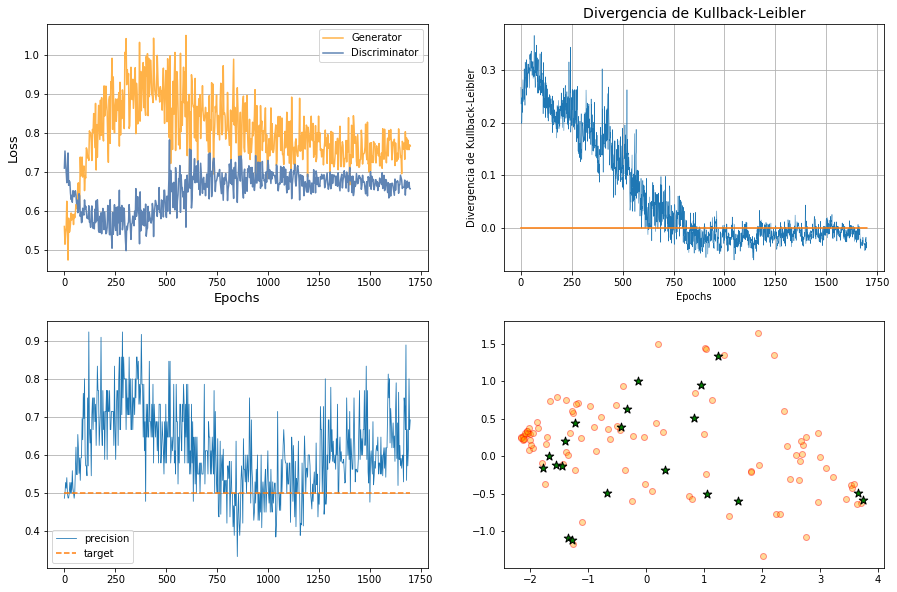

In [7]:
p = gan_utilities.plot_results(100)

In [8]:
def boxtplot_values(v):
    """
    parameters: 
        v: array with the values to make a boxplot
    return the values to plot a boxplot in the bokeh library
    return: [lower, quantile25, quantile50, quantile75, upper] and outliers
    """
    q25 = np.quantile(v, q=.25, interpolation="midpoint")
    q50 = np.quantile(v, q=.5, interpolation="midpoint")
    q75 = np.quantile(v, q=.75, interpolation="midpoint")
    lower = q25 - 1.5*(q75-q25)
    upper = q75 + 1.5*(q75-q25)
    #outliers
    outliers = v[(v<lower)|(v>upper)]

    return [lower, q25, q50, q75, upper], outliers

In [9]:
p_d, kld, l_g, l_d = gan_utilities.get_metrics(num_iter=300)

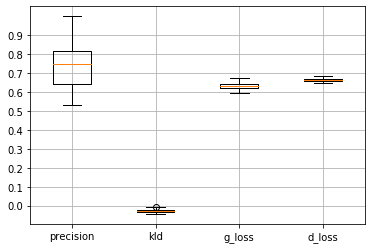

In [29]:
plt.boxplot([p_d, kld, l_g, l_d]);
#plt.yscale("logit")
plt.grid(axis="both");
plt.xticks(ticks=[1,2,3,4], labels=["precision", "kld", "g_loss", "d_loss"]);
plt.yticks(ticks=np.arange(0,1,.1), labels=np.round(np.arange(0,1.1,.1), 2));

#### testing the bokeh utils

In [11]:
bu = erutils.bokeh_utils()

In [33]:
[p_lower, p_q25, p_q50, p_q75, p_upper], p_outliers = bu.boxtplot_values(np.array(p_d))
[kld_lower, kld_q25, kld_q50, kld_q75, kld_upper], kld_outliers = bu.boxtplot_values(np.array(kld))
[gl_lower, gl_q25, gl_q50, gl_q75, gl_upper], gl_outliers = bu.boxtplot_values(np.array(l_g))
[dl_lower, dl_q25, dl_q50, dl_q75, dl_upper], dl_outliers = bu.boxtplot_values(np.array(l_d))

In [34]:
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.layouts import gridplot
output_notebook()

Loading BokehJS ...

In [67]:
x_p = ["Discriminador"]
p = figure(x_range=x_p, plot_height=200, plot_width=200, background_fill_color="#F1EEEE")
p.rect(x_p, p_lower, 0.2, 0.001, fill_color="black", line_color="black")
p.segment(x_p, p_lower, x_p, p_q25, line_color="black")
p.vbar(x_p, .4, p_q50, p_q25, fill_color="orange", line_color="orange")
p.vbar(x_p, .4, p_q75, p_q50)
p.segment(x_p, p_q75, x_p, p_upper, line_color="black")
p.rect(x_p, p_upper, 0.2, .001, fill_color="black", line_color="black")
p.yaxis.axis_label="Precisão"
show(p)

### testing the SMOTE algorithm
- to test the SMOTE algorithm, we employed the mnist dataset

In [4]:
from keras.datasets import mnist

(X_train, y_train), (_,_) = mnist.load_data()

In [30]:
#to increasing the number 2
x_minority = X_train[y_train==2]
print(x_minority.shape)
#we selected 50 random samples to train de smote algorithm
idxs = np.random.choice(range(x_minority.shape[0]), size=50, replace=False)
new_x_minority = x_minority[idxs].reshape((len(idxs), x_minority.shape[1]*x_minority.shape[2]))
print("Dataset size to train the SMOTE algorithm:", new_x_minority.shape)

(5958, 28, 28)
Dataset size to train the SMOTE algorithm: (50, 784)


In [31]:
smote = erutils.smote()
#we will increase the detaset by 100%
synthetic_samples = smote.get_syn_samples(new_x_minority, N=100, k=4)
print("shape of synthetic samples:", synthetic_samples.shape)

shape of synthetic samples: (50, 784)


real images


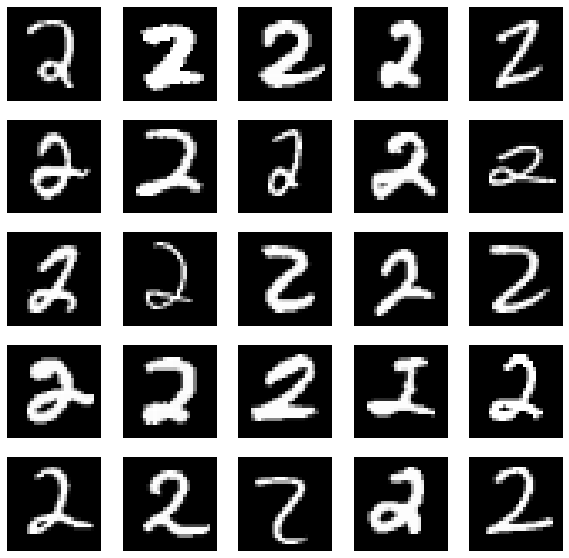

In [32]:
n_ims = 25
print("real images")
plt.figure(figsize=(10,10))
for i in range(n_ims):
    plt.subplot(5,5,i+1)
    plt.imshow(new_x_minority.reshape((len(new_x_minority), 28,28))[i],cmap="gray");
    plt.axis("off")

synthetic images


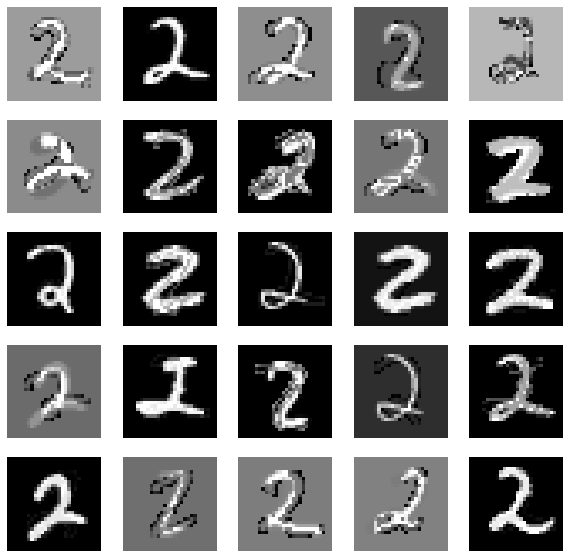

In [33]:
n_ims = 25
plt.figure(figsize=(10,10))
print("synthetic images")
for i in range(n_ims):
    plt.subplot(5,5,i+1)
    plt.imshow(synthetic_samples.reshape((len(synthetic_samples),28,28))[i],cmap="gray");
    plt.axis("off")